## Project - Ford GoBike 2018 Analysis

### Table of Contents ###
<ul>
<li><a href="#Project Overview">Project Overview</a></li>
<li><a href="#Data Overview">Data Overview</a></li>
<li><a href="#Data Wrangling">Data Wrangling</a></li>
<li><a href="#EDA1">Explanatory Data Analysis</a></li>
<li><a href="#Results">Results & Discussion</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
</ul>

<a id='Project Overview'></a>
### Project Overview

**The purpose of this project is to analyze a compilation of Ford Go-Bike's system data. Ford Go-Bike is a bike sharing service located in San Francisco, allowing easy access for transportation around the Bay Area. The project will focus on exploratory and explanatory data analysis by creating visualizations to understand the relationships between the key features and metrics collected by Ford Go-Bike.**

<a id='Data Overview'></a>
### Data Overview

**Ford Go-Bike offers public-use of their system data dating back to 2017. The following analysis covers all of the data collected over the 2018 year. 12 csv files (January-December) were downnloaded and concatenated into one main dataframe.**

**The following 15 features are collected by Ford Go-Bike: Trip Duration, Start Time and Date, End Time and Date, Start Station ID, Start Station Name, Start Station Latitude, Start Station Longitude, End Station ID, End Station Name, End Station Latitude, End Station Longitude, Bike ID, User Type, Member Year of Birth, and Member Gender.**

<a id='Data Wrangling'></a>
### Data Wrangling

**The 2018 dataset consists of over 1.8 million rows.**

**Import necessary libraries.**

In [1]:
# Pythons Statistal Libraries
import pandas as pd
import numpy as np
from scipy.stats import norm

# Pythons Visuals Libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sb

# Other Libraries used
import glob, os
from geopy.distance import geodesic

In [2]:
# Concatenate 12 monthly files for 2018
path = r'/Users/paraspatel/Desktop/Ford GoBike/2018 Data' # ENTER UNIQUE PATHWAY HERE
os.chdir(path)
files = glob.glob("*.csv")
df = pd.concat(pd.read_csv(f,header=0) for f in files)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,79489,11/30/18 13:40,12/1/18 11:45,NaN,NaN,37.420000,-121.940000,NaN,NaN,37.410000,-121.940000,4105,Customer,1982.0,Female,No
1,42847,11/30/18 20:13,12/1/18 8:07,37.0,2nd St at Folsom St,37.785000,-122.395936,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2614,Customer,1992.0,Male,No
2,1128,11/30/18 23:58,12/1/18 0:17,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,1496,Subscriber,1998.0,Male,Yes
3,2476,11/30/18 23:35,12/1/18 0:16,104.0,4th St at 16th St,37.767045,-122.390833,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1334,Subscriber,1959.0,Male,No
4,1273,11/30/18 23:54,12/1/18 0:15,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,60.0,8th St at Ringold St,37.774520,-122.409449,393,Subscriber,1993.0,Female,Yes


In [3]:
# Copy original dataframe
df_copy = df.copy()

In [4]:
# Examine dataset features
print(df.shape,'\n')
print(df.info(),'\n')

(1863721, 16) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131168
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 241.7+ MB
None 



In [5]:
# Check if null values exist
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [6]:
# Convert time columns to Date-Time
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [8]:
# Bin each trip by week for analysis 
df['Week'] = df['start_time'].dt.week

In [9]:
# Check DataFrame for duplicated rows
df.duplicated().sum()

0

**Columns converted to string. We'll leave two columns ('start_station_id' and 'bike_id') as an integer type in order to perform null analysis. Unnecessary columns will be dropped.**

In [10]:
df['member_birth_year'] = df['member_birth_year'].astype(pd.Int64Dtype())

df['end_station_id'] = df['end_station_id'].astype(pd.Int64Dtype())
df['end_station_id'] = df['end_station_id'].astype(str)

In [11]:
# Confirm features are proper type
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131168
Data columns (total 17 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          Int64
member_gender              object
bike_share_for_all_trip    object
Week                       int64
dtypes: Int64(1), datetime64[ns](2), float64(5), int64(3), object(6)
memory usage: 257.7+ MB


In [12]:
# Sort DataFrame by 'start_time' from January to December
df = df.sort_values('start_time').reset_index(drop=True)

**We'll add a 'distance_m' (i.e. distance in meters) column from the start station to end station. Pythons Geopy library can be used here by using the starting and ending coordinates provided in the dataset. Although this isn't the true path as it assumes a spherical model (shortest distance) between 2 geographical coordinates, it's still a good representation of distance traveled for this analysis.**

In [13]:
# function to calculate distance between 2 geographical coordinates
def distance_func (x):
    start = (x['start_station_latitude'], x['start_station_longitude'])
    end = (x['end_station_latitude'], x['end_station_longitude'])

    return geodesic(start, end).meters

df['distance_m'] = df.apply (lambda x: distance_func(x),axis=1)
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Week,distance_m
0,13709,2018-01-01 00:01:00,2018-01-01 03:50:00,86.0,Market St at Dolores St,37.769305,-122.426826,119,18th St at Noe St,37.761047,-122.432642,2924,Customer,NaN,NaN,No,1,1050.127516
1,145,2018-01-01 00:07:00,2018-01-01 00:10:00,316.0,San Salvador St at 1st St,37.330165,-121.885831,311,Paseo De San Antonio at 2nd St,37.333798,-121.886943,2473,Subscriber,1957,Male,No,1,415.073133
2,714,2018-01-01 00:07:00,2018-01-01 00:19:00,74.0,Laguna St at Hayes St,37.776435,-122.426244,70,Central Ave at Fell St,37.773311,-122.444293,2423,Subscriber,1986,Male,No,1,1627.451990


<a id='EDA1'></a>
### Explanatory Data Analysis

**The significance of the null data is assessed.**

**First, the Bike ID's are examined. The bar chart shows null values are highly concentrated in the 4100-4400 region.**

**A percentage of null values per week is calculated in the second plot. Null values increase dramatically from week 24 to 46. Although the number of trips starting at week 24 are more than double compared to the beginning of the year, as seen from the countplot, this still does not explain the rise of null values in the data.**

**The plots could suggest a product failure i.e. a bad manufacturing batch since the data is concentrated, a possible software glitch, or maybe an issue with the geo-tracking system. Whatever the case, since null values don't define any critical feature, we'll leave these rows in.**

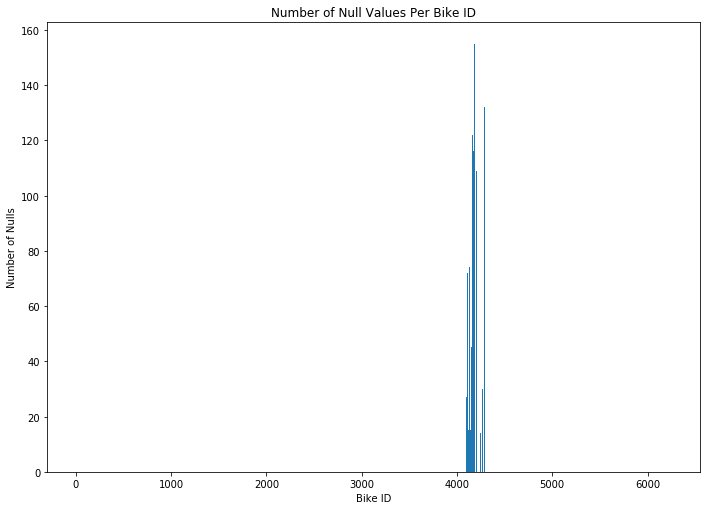

In [14]:
# Number of null values for every Bike ID
bike = df.groupby('bike_id')['start_station_id'].apply(lambda x: x.isnull().sum()).sort_values(ascending=False)

# Examine relationship between null values and Bike ID
base_color = sb.color_palette()[0]
plt.figure(figsize=[11.69, 8.27])
plt.bar(x = bike.index, height=bike.values, color = base_color);
plt.xlabel('Bike ID')
plt.ylabel('Number of Nulls')
plt.title('Number of Null Values Per Bike ID');

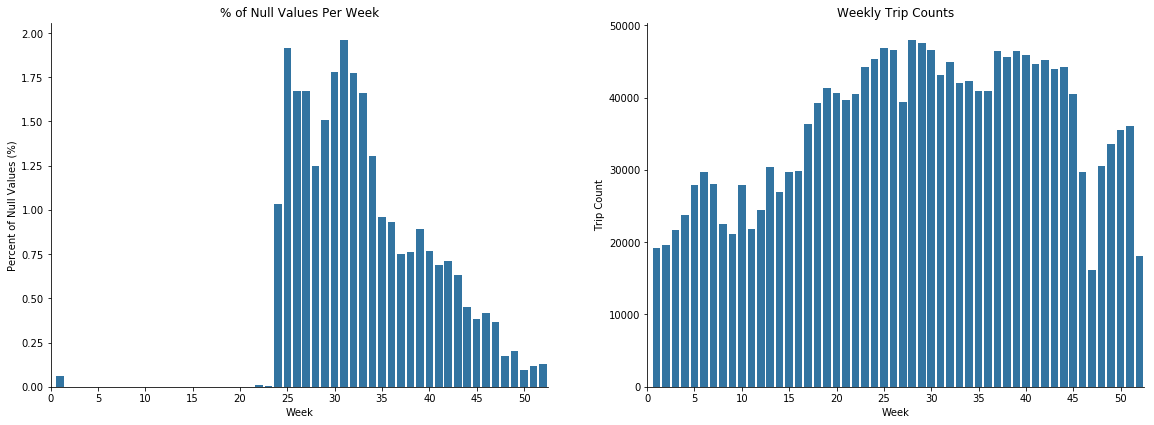

In [15]:
# Percentage of null values per week
null_perc = (df.groupby('Week').apply(lambda x: x.isnull().sum()).start_station_id) \
/(df['Week'].value_counts().sort_index())

plt.figure(figsize = [19.6, 6.7])
labels = [0,5,10,15,20,25,30,35,40,45,50]
xticks = np.arange(np.arange(df['Week'].min())-1, max(df['Week']), 5)

# Plot of Percentage of Nulls by Week
plt.subplot(1, 2, 1)
ax1 = sb.barplot(x = null_perc.index.values, y = null_perc.values * 100, color = base_color);
plt.xticks(xticks,labels)
plt.title('% of Null Values Per Week')
ax1.set(xlabel='Week', ylabel='Percent of Null Values (%)')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Plot of Trip Counts by Week
plt.subplot(1, 2, 2)
ax2 = sb.countplot(x="Week", data=df, color = base_color)
plt.xticks(xticks,labels)
plt.title('Weekly Trip Counts')
ax2.set(xlabel='Week', ylabel='Trip Count')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False);

In [17]:
# Calculate Age of Users
df['Age'] = 2018 - df['member_birth_year']

# Create Master DataFrame by dropping unecessary columns - Cleaning
df.drop(columns = ['bike_id','end_station_latitude','end_station_longitude',
                    'end_station_id','start_station_latitude','start_station_longitude',
                    'member_birth_year'], inplace=True);
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,Week,distance_m,Age
0,13709,2018-01-01 00:01:00,2018-01-01 03:50:00,86.0,Market St at Dolores St,18th St at Noe St,Customer,NaN,No,1,1050.127516,NaN
1,145,2018-01-01 00:07:00,2018-01-01 00:10:00,316.0,San Salvador St at 1st St,Paseo De San Antonio at 2nd St,Subscriber,Male,No,1,415.073133,61
2,714,2018-01-01 00:07:00,2018-01-01 00:19:00,74.0,Laguna St at Hayes St,Central Ave at Fell St,Subscriber,Male,No,1,1627.451990,32
3,1151,2018-01-01 00:09:00,2018-01-01 00:28:00,97.0,14th St at Mission St,20th St at Bryant St,Subscriber,Male,No,1,1352.512847,26
4,1359,2018-01-01 00:14:00,2018-01-01 00:37:00,11.0,Davis St at Jackson St,Broadway at Kearny,Customer,Male,No,1,666.808263,23


#### Univariate Relationships
**The following univariate relationships will be examined: distribution of trip duration in time (s), distance of the trips (m), top 10 starting locations, top 10 destinations, user type distribution, bike share for all trip distribution, and the user age to determine which age ranges are most likely to use the product.**

**Binning reveals the data is highly skewed to the right. A log transform can be used to reduce the skeweness of the data.**

In [18]:
# Distribution of trip durations
bins_sec = [0, 500, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 40000, 60000, 90000]
sec_bin = pd.cut(df['duration_sec'], bins_sec)
sec_bin.value_counts()

(0, 500]          816215
(500, 1000]       694002
(1000, 2000]      276197
(2000, 3000]       37573
(5000, 10000]      12211
(3000, 4000]       11833
(4000, 5000]        6775
(10000, 20000]      5157
(20000, 40000]      1872
(40000, 60000]       950
(60000, 90000]       936
Name: duration_sec, dtype: int64

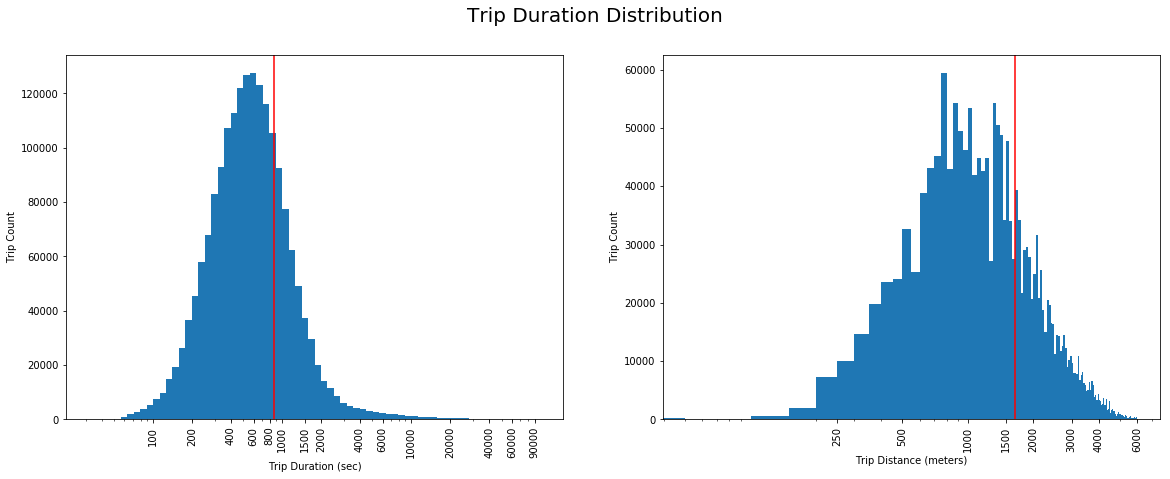

In [19]:
# Histograms of duration and distance of trips - log transformation of the x-scale
np.log10(df['duration_sec'].describe());
df['distance_m'].describe()

bin_size = 0.05
bins = 10**np.arange(1.5, 5+bin_size, bin_size)
ticks = [100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 10000, 20000, 40000, 60000, 90000]
ticks_distance = [250, 500, 1000, 1500, 2000, 3000, 4000, 6000]
labels = ['{}'.format(val) for val in ticks]

plt.figure(figsize = [19.6, 6.7])
plt.subplot(1, 2, 1)
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.ylabel('Trip Count')
plt.xscale('log')
plt.xticks(ticks, labels, rotation = 'vertical')
plt.xlabel('Trip Duration (sec)')
plt.axvline(x=df.duration_sec.mean(), color='r') # Vertical Mean Line

plt.subplot(1, 2, 2)
bins1 = np.arange(0, 6000+50, 50)
plt.hist(data = df.query('0 < distance_m <= 10000'), x = 'distance_m', bins = bins1)
plt.xscale('log')
plt.xticks(ticks_distance, ticks_distance, rotation = 'vertical')
plt.ylabel('Trip Count')
plt.xlabel('Trip Distance (meters)')
plt.suptitle('Trip Duration Distribution', fontsize=20);
plt.axvline(x=df.query('0 < distance_m <= 10000')['distance_m'].mean(), color='r'); # Vertical Mean Line

**The starting and ending locations are very similar. This could point to many customers using the service as a means to travel to work i.e going back and forth between 2 locations. The Top 3 locations are the same: Harry Bridges Plaza, Townsend St. at 4th St. (Station 2), and Townsend St. at 4th St.**

In [20]:
df['start_station_name'].value_counts().nlargest(10)

San Francisco Ferry Building (Harry Bridges Plaza)           38461
San Francisco Caltrain Station 2  (Townsend St at 4th St)    37617
San Francisco Caltrain (Townsend St at 4th St)               35092
Market St at 10th St                                         34918
Berry St at 4th St                                           33716
The Embarcadero at Sansome St                                33390
Montgomery St BART Station (Market St at 2nd St)             32131
Powell St BART Station (Market St at 4th St)                 31656
Steuart St at Market St                                      28367
Howard St at Beale St                                        26535
Name: start_station_name, dtype: int64

In [21]:
df['end_station_name'].value_counts().nlargest(10)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    50000
San Francisco Ferry Building (Harry Bridges Plaza)           44113
San Francisco Caltrain (Townsend St at 4th St)               42970
The Embarcadero at Sansome St                                39222
Montgomery St BART Station (Market St at 2nd St)             35955
Market St at 10th St                                         34365
Powell St BART Station (Market St at 4th St)                 33086
Berry St at 4th St                                           32786
Steuart St at Market St                                      28592
Powell St BART Station (Market St at 5th St)                 26002
Name: end_station_name, dtype: int64

**Interestingly enough, most service users are actually subscribers. This acutally makes sense when considering this service markets itself as an alternative means of public transportation (especially to lower income areas) like public transit/bus.**

In [22]:
df['user_type'].value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

In [23]:
df['bike_share_for_all_trip'].value_counts()

No     1701386
Yes     162335
Name: bike_share_for_all_trip, dtype: int64

**The start time distribution is explored below. The data was separated into hourly bins for simplicity. Peak times are at 8:00 AM and 5:00 PM (rush hour times).**

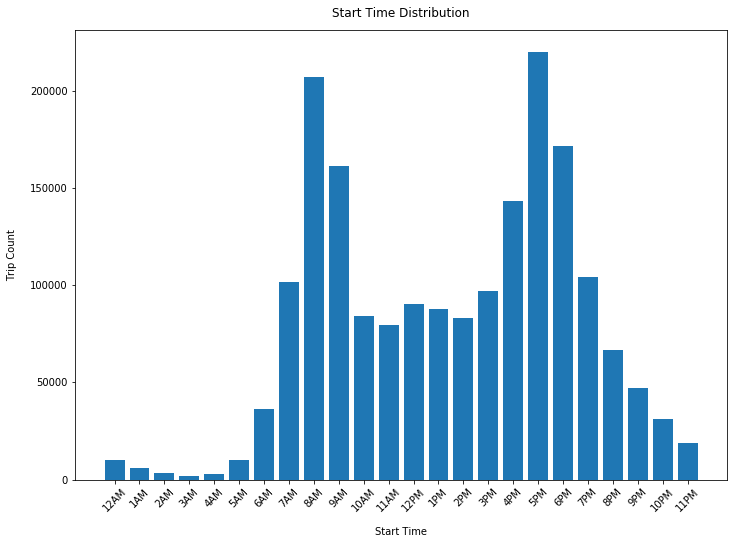

In [24]:
df['start_time_hour'] = df['start_time'].dt.hour

time_labels = ['12AM','1AM','2AM','3AM','4AM','5AM','6AM','7AM','8AM','9AM','10AM','11AM','12PM',
              '1PM','2PM','3PM','4PM','5PM','6PM','7PM','8PM','9PM','10PM','11PM']

plt.figure(figsize=[11.69, 8.27])
time_xticks = np.arange(0, 24, 1)

plt.bar(x = df['start_time_hour'].value_counts().index, height = df['start_time_hour'].value_counts().values)
plt.title('Start Time Distribution', pad=13)
plt.xlabel('Start Time', labelpad=13)
plt.ylabel('Trip Count', labelpad=13)
plt.xticks(time_xticks,time_labels, rotation = 45);

**Age is queried for 2 reasons. Very few data points actually exist for user ages greater than 75. This removes noise from the plot. Also, some age's exist in the dataset that are likely unrealistic or incorrect. Chances are, senior citizens older than 120 or let alone 100 would not be using this service. Possible explanation could be the customer entered in the birth year incorrectly.**

In [25]:
# Examine Ages of customers 'older' than 100
senior_age = df.dropna(axis=0, subset=['Age']).reset_index(drop=True)
senior_age['Age'] = senior_age.Age.astype(int)
senior_age.query('Age >= 100')['Age'].value_counts()

118    632
107    262
116    169
117     29
130     23
104     18
114     12
137      5
109      4
129      3
112      2
115      1
Name: Age, dtype: int64

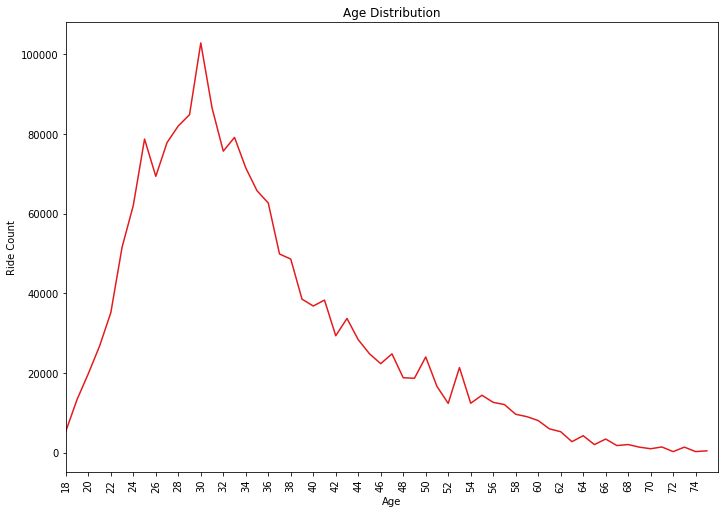

In [26]:
# View 'Age' column stats to determine appropriate plot parameters
df['Age'].describe();

# Drop null values for analysis (No Effect on results), Filter Ages less than 75
Age_hist = df.dropna(axis=0, subset=['Age']).reset_index(drop=True)
Age_hist.Age = Age_hist.Age.astype(int)
Age_hist = Age_hist.query('Age <= 75')

# Line Plot
base_color1 = sb.color_palette('Set1')[0]
plt.figure(figsize=[11.69, 8.27])
labels1 = range(18,75,2)
xticks1 = np.arange(18, 76, 2)
ax3 = sb.lineplot(x= Age_hist['Age'].value_counts().index, y = Age_hist['Age'].value_counts().values, color = base_color1)
ax3.set(xlabel='Age', ylabel='Ride Count')
plt.xticks(xticks1,labels1, rotation = 'vertical')
plt.xlim((18,76))
plt.title('Age Distribution');

**Bivariate Relationships**

**First, we'll investigate how the Ford's Go-Bike membership program (bike share for all) relates to the duration of the ride. It's important to note that according to the fordgobike website, membership includes first 60 minutes of each trip. Rides longer than 60 minutes result in additional fees of 3 dollars for each additional 15 minutes or potential account suspension.**

**Second, we'll take a look at male/female distribution among user types to determine if one gender uses the Bike Share For All program more than the other.**

In [27]:
# Function to log transform 'x' values.
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

**We can see by the violin plot that 3.0% and 1.2% of Bike Share For All trips lasted over 45 min and 60 min, respectively, meaning some program member incurred either an extra fee or possible account suspension. Reducing the alotted time for a ride, to say 45 min, before a fee could be considered, atleast for A/B testing.**

Percentage of Bike Share For All rides that lasted more than 45 min (Green Line) = 3.0578741491360457
Percentage of Bike Share For All rides that lasted more than 60 min (Red Line) = 1.2270921243108388


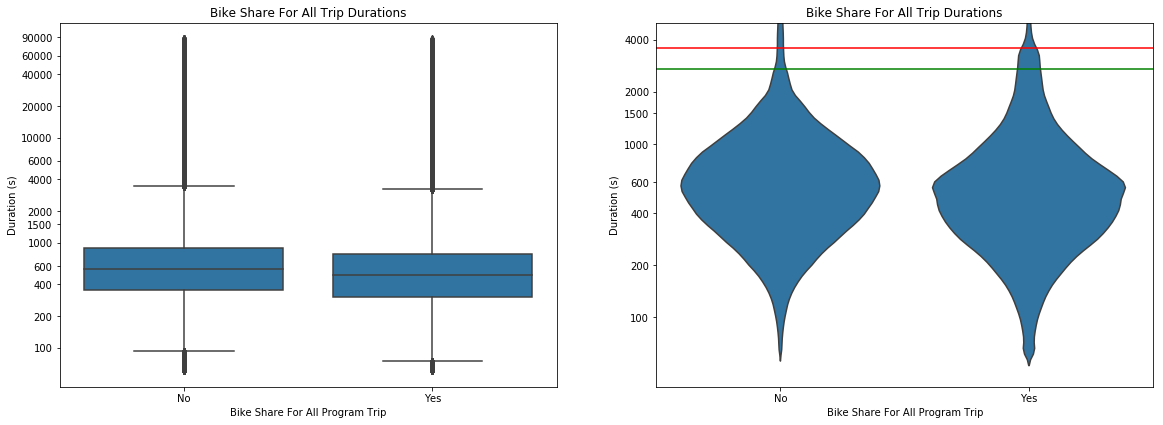

In [28]:
# Duration vs Membership Program
plt.figure(figsize = [19.6, 6.7])
ticks = [100, 200, 400, 600, 1000, 1500, 2000, 4000, 6000, 10000, 20000, 40000, 60000, 90000]

# left plot: box plot of complete data
plt.subplot(1, 2, 1)
sb.boxplot(x = df['bike_share_for_all_trip'], y = df['duration_sec'].apply(log_trans), color = base_color)
plt.yticks(log_trans(ticks), ticks);
plt.xlabel('Bike Share For All Program Trip')
plt.ylabel('Duration (s)')
plt.title('Bike Share For All Trip Durations')

# right plot: violin plot filtering outliers from previous boxplot
plt.subplot(1, 2, 2)
ax5 = sb.violinplot(x = df['bike_share_for_all_trip'], y = df['duration_sec'].apply(log_trans), color = base_color,
                   inner = None)
plt.yticks(log_trans(ticks), ticks)
plt.ylim((1.6,3.7))
plt.xlabel('Bike Share For All Program Trip')
plt.ylabel('Duration (s)')
plt.title('Bike Share For All Trip Durations')

ax5.axhline(y=np.log10(3600), color='r') # Horizontal Line at 60 minutes
ax5.axhline(y=np.log10(2700), color='g'); # Horizontal Line at 45 minutes

# Calculate % of trips where Program Members ride for more than 45 min & 60 minutes
print("Percentage of Bike Share For All rides that lasted more than 45 min (Green Line) =",
      df.query("bike_share_for_all_trip == 'Yes' & duration_sec >=2700").shape[0]*100 /\
df.query("bike_share_for_all_trip == 'Yes'").shape[0])

print("Percentage of Bike Share For All rides that lasted more than 60 min (Red Line) =",
      df.query("bike_share_for_all_trip == 'Yes' & duration_sec >=3600").shape[0]*100 /\
df.query("bike_share_for_all_trip == 'Yes'").shape[0])

**The clustered bar plot reveals that Ford Go Bike has a much larger male user base than female/other user base, especially those who subscribe to the service. Female customers could be a key demographic for Ford Go-Bike to target.**

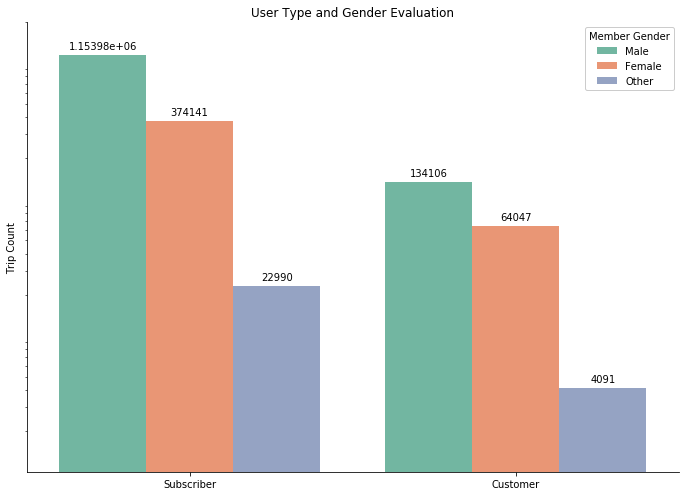

In [29]:
# Log Transform performed on y-scale
gender = df.dropna(axis=0, subset=['member_gender']).reset_index(drop=True)
ticks2 = [1000, 5000, 10000, 50000, 100000, 250000, 500000, 750000, 2000000]

# Countplot
plt.figure(figsize=[11.69, 8.27])
ax5 = sb.countplot(data = gender, x = 'user_type', hue = 'member_gender', palette = 'Set2', alpha = 1)
ax5.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Member Gender')
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

plt.yscale('log')
plt.yticks(ticks2, None)
ax5.yaxis.set_major_locator(plt.NullLocator())
plt.ylabel('Trip Count')
plt.xlabel(None)
plt.title('User Type and Gender Evaluation')
rcParams['axes.titlepad'] = 15

# Add values to bars
for p in ax5.patches[0:]:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h != 0:
        ax5.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), 
                     textcoords="offset points", ha="center", va="bottom")

**Multivariate Relationship**

**The top 10 starting locations are examined using a heat map. There are a few interesting insights here. Although the majority of rides are in fact made during the day and afternoon, the longest rides in terms of duration are late at night interestingly enough. Customers traveling from Embarcadero at Sansome St. are traveling much longer compared to other locations. The shortest trip average observed is at the San Francisco Caltrain.**

Number of Rides By Time of Day 
 3PM-6PM     83472
6AM-9AM     75770
9AM-12PM    63909
6PM-9PM     57517
12PM-3PM    38297
9PM-12AM    10485
12AM-3AM     1380
3AM-6AM      1053
Name: session, dtype: int64


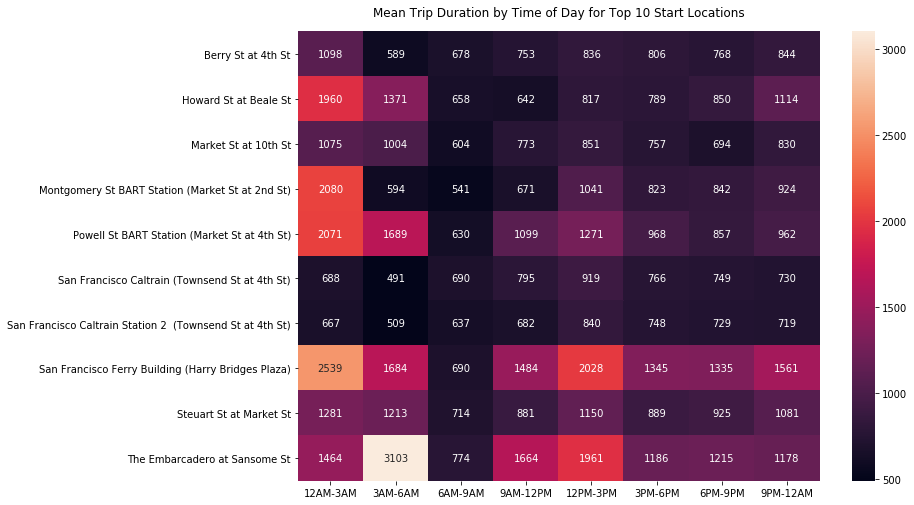

In [30]:
# Create new column binning each start time to time of day
multiv = df.copy()
multiv = multiv.assign(session=pd.cut(multiv['start_time'].dt.hour, bins=8,
                                      labels=['12AM-3AM','3AM-6AM','6AM-9AM','9AM-12PM','12PM-3PM','3PM-6PM','6PM-9PM','9PM-12AM']))

# Filter dataframe based on top 10 list of start stations
top_10 = df['start_station_name'].value_counts().nlargest(10).index.tolist()
multiv = multiv[multiv['start_station_name'].isin(top_10)]

# Calculate Categorical Mean for each group
cat_means = multiv.groupby(['session', 'start_station_name']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'mean_duration')
cat_means = cat_means.pivot(index = 'start_station_name', columns = 'session',
                            values = 'mean_duration')

# Plot Heatmap
plt.figure(figsize=[11.69, 8.27])
sb.heatmap(cat_means, annot = True, fmt = '.0f', cbar_kws = {'label' : ''})
plt.xlabel(None)
plt.ylabel(None)
plt.title('Mean Trip Duration by Time of Day for Top 10 Start Locations')
rcParams['axes.titlepad'] = 15;

print('Number of Rides By Time of Day \n', multiv.session.value_counts())

<a id='Results'></a>
### Results & Discussion

**The analysis above is divided into the 3 sections: Univariate Relationships, Bivariate Relationships, and Multivariate Relationships.**

**Distance, trip duration, and age are investigated in the univariate relationship section. All 3 of these variables follow a log-normal distribution. Accounting for outliers, the mean duration traveled is roughly 800 s with most trips lasting 650 s. The mean distance traveled is approximately 1600 m with a majority of trips lasting anywhere between 700-1500 m. Most users who have used the Ford Go-Bike service are young adults (late 20's to early 30's) with a steady drop off beginning at 33 years old.**

**Next bivariate relationships between trip duration, trip type (Ford Go-Bikes Bike Share For All), membership, and user gender were examined. Bike Share For All trips are expected to level off at 60 min due to the fee for additional time over this time limit. This hypothesis is supported by the data as only 1.2% of bike share for all trips lasted over 60 min. Gender distribution among user types (Customer vs Subscriber) also revealed Ford Go-Bikes service is far more popular with males than females/other. Over 700,000 more trips were made by male subscribers vs female subscribers and over 70,000 trips more trips were made by male customers vs female customers.**


**The multivariate relationship analysis focus' on the top 10 starting locations (based on number of trips) and the length of the trips made from these locations at different time frames of the day. The heat map is fairly distributed but a few insights can be made. For one, the longest rides occur from 12AM - 3AM, but it's also important to note this group contains only 1,380 data points compared to 3PM-6PM time frames for instance, that contain over 80,000 data points. The shortest rides occur in the 6AM-9AM time frame, most likely users using the service to travel short distances to work. Further investigation also shows the longest rides are starting from the San Francisco Ferry Building.**

<a id='Conclusion'></a>
### Conclusion

**The 2018 system data by Ford Go-Bike used in this analysis provided some useful insights into key features and relationships between age, user types, distance, trip duration, location, etc. The visualizations describe univariate, bivariate, and multivariate relationships between these key features. The analysis can be used for business solutions, product investigation, and marketing strategies. As long as the data structure is maintaned, this analysis can be repeated for any given month or span of months.**

### Credit Sources: ###
1. Udacity
2. Stack Overflow